In [2]:
import pandas as pd
import numpy as np
import os
import struct
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa

In [3]:
data=pd.read_csv('metadata/UrbanSound8K.csv')

In [4]:
def path_class(file_name):
    data_row=data[data['slice_file_name']==file_name]
    path_name=os.path.join('audio','fold'+ str(data_row.fold.values[0]),file_name)
    return path_name,data_row['class'].values[0]
    

In [5]:
X=[]

In [6]:
import librosa
for i in range(data.shape[0]):
    temp=str(data['slice_file_name'][i])
    fullpath,_ = path_class(temp)
    librosa_load, librosa_sampling_rate = librosa.load(fullpath, duration=4.0)
    arr=librosa.feature.mfcc(y=librosa_load, sr=librosa_sampling_rate)
    X.append(arr)

In [7]:
for i in range(len(X)):
    t=173-X[i].shape[1]
    X[i]=np.pad(X[i],((0, 0), (0,t)),'constant')

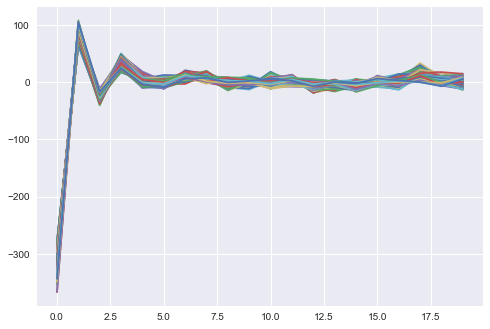

In [8]:
plt.style.use("seaborn")
plt.plot(arr)
plt.show()

In [9]:
import librosa.display

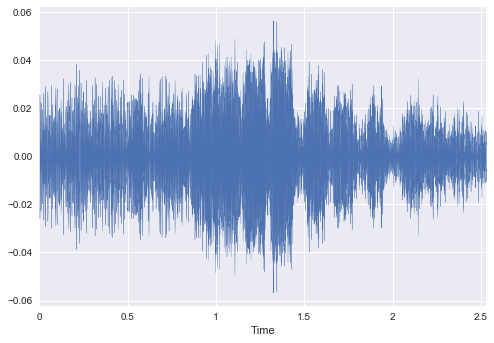

In [10]:
librosa.display.waveplot(librosa_load)

In [11]:
Y=np.asarray(data['class'])
split=int(0.8*(data.shape[0]))

In [12]:
Y=Y.reshape(-1,1)

In [13]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
Y=enc.fit_transform(Y)

In [14]:
#X=np.asarray(X)
np.asarray(Y)

array(<8732x10 sparse matrix of type '<class 'numpy.float64'>'
	with 8732 stored elements in Compressed Sparse Row format>, dtype=object)

In [15]:
Y=Y.todense()

In [20]:
t=np.asarray(X)

In [22]:
t.shape

(8732, 20, 173)

In [23]:
X=t.reshape(8732,20,173,1)
X_train=X[:split]
X_test=X[split:]
Y_train=Y[:split]
Y_test=Y[split:]

In [24]:
X.shape

(8732, 20, 173, 1)

In [25]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten

Using TensorFlow backend.


In [26]:
model=Sequential()
c_layer1=Conv2D(128,kernel_size=3,activation='relu',input_shape=(20,173,1))
c_layer2=Conv2D(256,kernel_size=3,activation='relu')
c_layer3=Conv2D(256,kernel_size=3,activation='relu')
c_layer4=Conv2D(256,kernel_size=3,activation='relu')
flat=Flatten()
h_layer=Dense(10,activation='sigmoid')
model.add(c_layer1)
model.add(c_layer2)
model.add(c_layer3)
model.add(c_layer4)
model.add(flat)
model.add(h_layer)

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5,batch_size=10)

Train on 6985 samples, validate on 1747 samples
Epoch 1/5
6985/6985 [==============================] - 169s 24ms/step - loss: 0.0899 - accuracy: 0.9666 - val_loss: 0.5165 - val_accuracy: 0.8970
Epoch 2/5
6985/6985 [==============================] - 164s 23ms/step - loss: 0.0621 - accuracy: 0.9782 - val_loss: 0.6347 - val_accuracy: 0.8919
Epoch 3/5
6985/6985 [==============================] - 163s 23ms/step - loss: 0.0337 - accuracy: 0.9888 - val_loss: 0.8545 - val_accuracy: 0.8788
Epoch 4/5
6985/6985 [==============================] - 164s 23ms/step - loss: 0.0366 - accuracy: 0.9892 - val_loss: 1.0087 - val_accuracy: 0.8913
Epoch 5/5
6985/6985 [==============================] - 164s 24ms/step - loss: 0.0261 - accuracy: 0.9924 - val_loss: 1.2530 - val_accuracy: 0.8887


In [29]:
print(Y_test[1])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [30]:
y_pred=model.predict(X_test)

In [31]:
y_pred[1]

array([5.0842762e-05, 2.6822090e-06, 7.8678131e-06, 9.9870849e-01,
       1.1026859e-06, 2.1860301e-03, 3.0994415e-06, 8.7636113e-03,
       7.9065561e-05, 8.9406967e-08], dtype=float32)